# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset ;
- - selecionando alguns atributos e descartando outros;
- Aplique três métodos de clustering distintos nas duas bases acima.
- Para cada dataset , em cada uma das bases, analise os resultados
 segundo medidas de qualidade de clustering , usando índices de
 validação interna (SSW, SSB, silhueta, Calinski-Harabasz, Dunn e
 Davis-Bouldin) e externa (pureza, entropia, acurácia, F-measure ,
 ARI, NMI).
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada dataset


## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import mode
from munkres import Munkres

# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **dim032.csv** que contém dados não descritos, onde foram feitos para a realização de clustering que se encontram no site:
http://cs.uef.fi/sipu/datasets/

## 1.1 Carregamento do arquivo

In [2]:
from clustering.labelMatch import rotulos, labelmatch
dataset = './dataset/dim032/dim032.csv'
clusters = './dataset/dim032/dim032-pa.csv'

In [ ]:
data = pd.read_csv(
    dataset,
    header = None
    )

label = pd.read_csv(
    clusters,
    header = None
    )

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,84,152,100,52,95,186,169,106,37,186,...,190,65,214,116,75,55,123,65,154,177
1,86,149,101,56,93,181,171,116,37,192,...,191,79,215,116,76,60,130,71,151,181
2,83,149,99,51,96,187,169,108,34,191,...,190,65,213,118,73,55,125,63,155,178
3,86,142,101,64,105,183,172,116,49,180,...,186,69,209,120,68,56,123,67,144,181
4,89,145,108,54,91,180,175,107,35,192,...,188,67,212,118,91,50,135,58,147,165


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,95.626953,109.116211,112.750000,127.612305,139.097656,130.491211,142.145508,134.344727,97.023438,135.126953,...,120.544922,154.849609,123.900391,123.157227,105.608398,122.179688,130.062500,130.897461,106.218750,116.990234
std,33.615901,56.908917,51.135914,48.141948,59.470162,39.287918,45.671907,59.378414,42.142075,66.366363,...,67.089616,60.070835,58.308579,55.723743,48.049909,58.800397,61.676195,55.330114,47.630102,55.882102
min,30.000000,40.000000,40.000000,41.000000,28.000000,48.000000,48.000000,25.000000,24.000000,29.000000,...,29.000000,39.000000,28.000000,25.000000,24.000000,28.000000,40.000000,51.000000,41.000000,34.000000
25%,73.000000,56.000000,72.000000,81.750000,88.000000,104.000000,106.000000,79.000000,63.000000,58.500000,...,53.000000,118.750000,69.000000,87.500000,61.000000,56.000000,64.000000,88.000000,67.000000,74.000000
50%,88.500000,97.000000,97.000000,142.000000,169.000000,129.000000,159.000000,145.000000,85.000000,169.500000,...,111.500000,176.000000,117.500000,116.000000,113.000000,138.000000,143.000000,118.500000,102.000000,97.000000
75%,121.000000,145.000000,168.000000,162.000000,186.000000,150.000000,171.000000,188.750000,134.750000,187.000000,...,192.000000,207.000000,181.000000,179.750000,143.250000,169.750000,189.000000,182.250000,136.750000,162.750000
max,162.000000,219.000000,217.000000,217.000000,218.000000,225.000000,220.000000,229.000000,174.000000,222.000000,...,223.000000,235.000000,222.000000,218.000000,208.000000,219.000000,226.000000,227.000000,218.000000,223.000000


# 2. Pré-processamento

#### Validações efetivadas:
- 1. Dados faltantes representados por "NaN"
- 2. Dados que não possuem valores númericos

In [6]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [7]:
for col in data:
    print(col, data[col].unique())

0 [ 84  86  83  89  85  82  88  92  87  75  90  79  61  68  63  65  64  57
  66  73  62  69  60  67  55  58  56  74 150 153 152 158 154 159 151 148
 149 156 142 157 155 162  91  78  95  97  93 138 140 143 141 144 137 147
 136 133 135 139 129 145  72  76  71  70  77 124 126 132 119 123 122 125
 121 120 128 113 115 117  37  39  34  35  40  38  36  30  33  41 105 110
 107 108 102 111 112 104 101 106 109 118 114  94  96  43  44  50  47  42
  49  46  48  45 116  80  81 146 103  99 100]
1 [152 149 142 145 154 151 148 150 153 158 162 155 147 159 119 107 113 115
 112 114 110 111 108 118 106 128 116 117 105 104 103 100 101 109 102  51
  50  49  48  52  47  55  46  53  56 200 203 206 205 214 204 207 208 201
 211 212 209 213 215 218 210 216 219  68  75  70  67  69  72  66  80  65
  71  79  73  64  74  62 121 124 125 123 122 126 120  76  77  78  57  59
  58  63  60  61  54  83  84  89  82  88  94  87  85  81  90 141 140 143
 137 139 146 144 134 202 198 199 197  45  44  40]
2 [100 101  99 108  97  

#### 2.1 Conclusão:
- Os dados não possuem a necessidade de pré-processamento visto que já estão todos com valores validos

###  2.3 Análise estatística

In [ ]:
data.corr()

### 2.4 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [8]:
scaler = preprocessing.StandardScaler()
data_scaler = scaler.fit_transform(X = data)

In [9]:
data_scaler

array([[-0.34604559,  0.75391953, -0.24945736, ..., -1.19156922,
         1.00366357,  1.07438852],
       [-0.28652087,  0.70117796, -0.22989208, ..., -1.08307619,
         0.94064741,  1.14600277],
       [-0.37580795,  0.70117796, -0.26902264, ..., -1.22773356,
         1.02466895,  1.09229209],
       ...,
       [ 0.15991457, -1.00413298,  1.13967774, ...,  0.0199363 ,
        -0.17263801, -0.78758186],
       [ 0.30872638, -0.8810693 ,  1.02228604, ...,  0.00185413,
        -0.17263801, -0.78758186],
       [ 0.27896402, -0.98655246,  1.08098189, ...,  0.0199363 ,
        -0.17263801, -0.75177474]])

In [10]:
data_scaled = pd.DataFrame(data_scaler)
data_scaled.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.346046,0.753920,-0.249457,-1.571379,-0.741871,1.413562,0.588274,-0.477591,-1.425007,0.766923,...,1.035764,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389
1,-0.286521,0.701178,-0.229892,-1.488251,-0.775518,1.286234,0.632086,-0.309097,-1.425007,0.857375,...,1.050677,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003
2,-0.375808,0.701178,-0.269023,-1.592161,-0.725048,1.439028,0.588274,-0.443892,-1.496230,0.842299,...,1.035764,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292
3,-0.286521,0.578114,-0.229892,-1.321994,-0.573638,1.337165,0.653992,-0.309097,-1.140117,0.676472,...,0.976113,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003
4,-0.197234,0.630856,-0.092935,-1.529815,-0.809165,1.260769,0.719710,-0.460741,-1.472489,0.857375,...,1.005939,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546


### 2.5 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há alguns outliers.

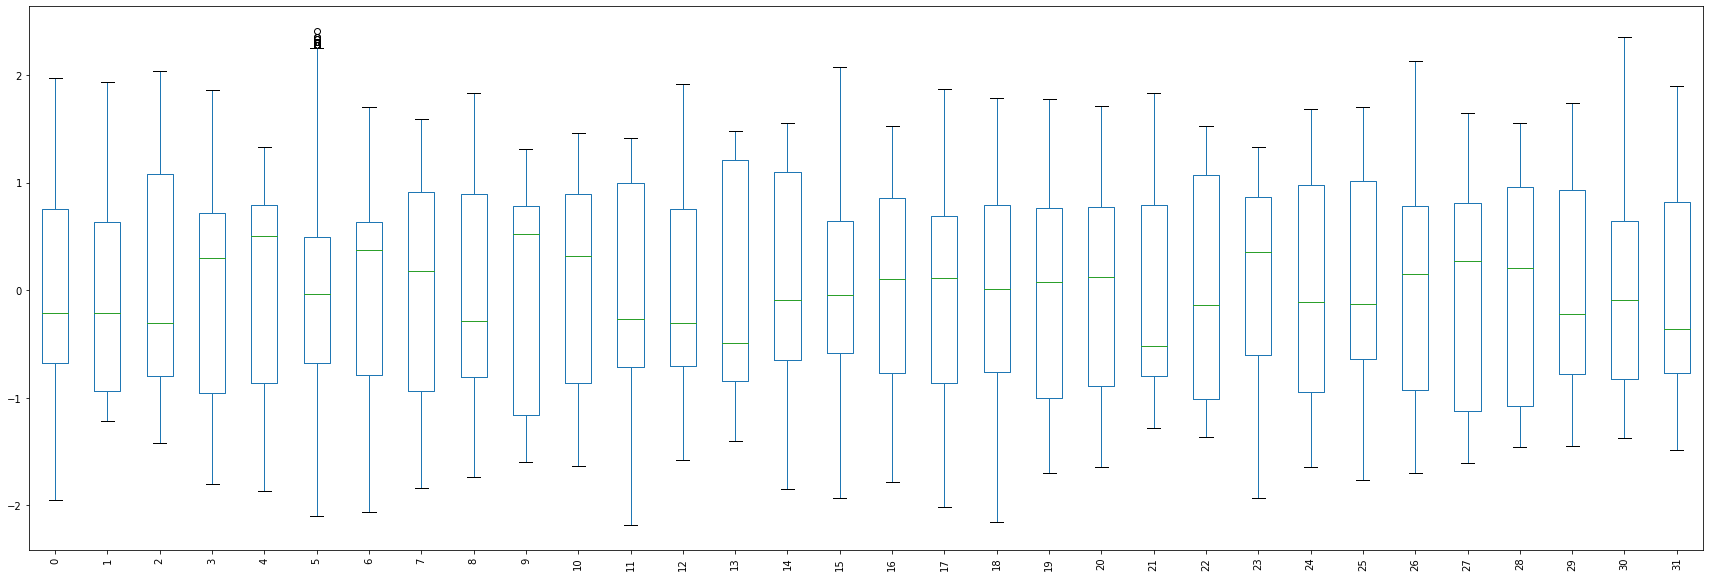

In [11]:
data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

# 3. Clustering

## 3.1 Dataset Completo

### 3.1.1 K-Means

In [12]:
data_kmeans = data_scaled.copy()

In [13]:
kmeans = KMeans(n_clusters = 16, init = 'random')
kmeans.fit(data_kmeans)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

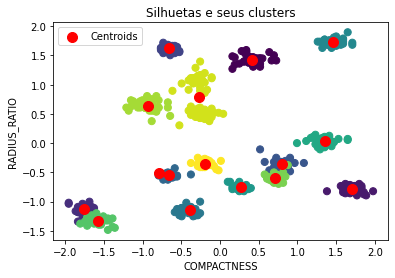

In [14]:
plt.scatter(data_scaler[:,0], data_scaler[:,31], s = 50, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 31], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()


### 3.1.2 Agglomerative Clustering

In [15]:
data_agglo = data_scaled.copy()

In [16]:
agglo = AgglomerativeClustering(n_clusters=16, linkage='ward')
agglo.fit(data_agglo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=16)

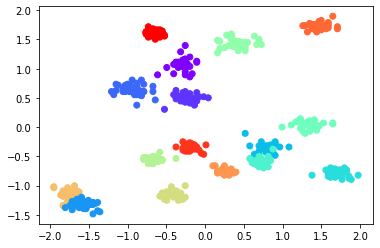

In [17]:
plt.scatter(data_scaler[:,0],data_scaler[:,31], c=agglo.labels_, cmap='rainbow')

### 3.1.3 Spectral Clustering

In [18]:
data_spectral = data_scaled.copy()

In [19]:
spectral = SpectralClustering(n_clusters=16)
spectral.fit(data_spectral)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=16, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

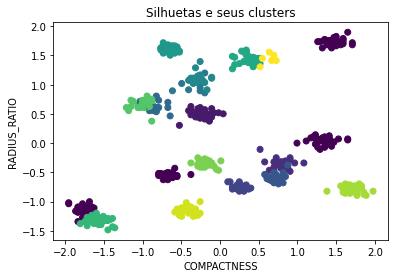

In [20]:
plt.scatter(data_scaler[:,0], data_scaler[:,31], c = spectral.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()

## 3.2 Dataset com atributos selecionados

In [21]:
data_reduzida = pd.DataFrame(SelectKBest(chi2, k=4).fit_transform(data, label))
data_reduzida.shape

data_scaler2 = scaler.fit_transform(X = data_reduzida)

In [22]:
data_scaler2

array([[ 0.76692323,  0.18389215, -0.63955056,  1.03576412],
       [ 0.85737465,  0.19968827, -0.54581938,  1.05067684],
       [ 0.84229941,  0.21548439, -0.65517242,  1.03576412],
       ...,
       [-1.0873309 ,  1.38439736, -0.67079429,  1.09541499],
       [-1.04210519,  1.40019348, -0.65517242,  1.11032771],
       [-1.0873309 ,  1.36860124, -0.67079429,  1.12524043]])

In [23]:
data_scaled2 = pd.DataFrame(data_scaler2)
data_scaled2.head()


,0,1,2,3
0,0.766923,0.183892,-0.639551,1.035764
1,0.857375,0.199688,-0.545819,1.050677
2,0.842299,0.215484,-0.655172,1.035764
3,0.676472,0.294465,-0.592685,0.976113
4,0.857375,0.215484,-0.545819,1.005939


### 3.2.1 K-Means

In [24]:
data_kmeans2 = data_scaled2.copy()

In [25]:
kmeans2 = KMeans(n_clusters = 16, init = 'random')
kmeans2.fit(data_kmeans2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

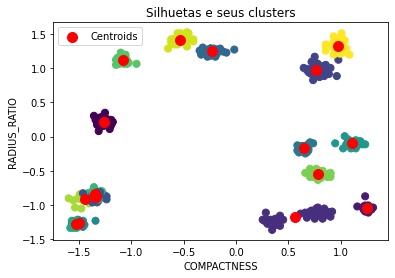

In [26]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], s = 50, c = kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 3], s = 100, c = 'red',label = 'Centroids')
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.legend()
plt.show()

### 3.2.2 Agglomerative Clustering

In [27]:
data_agglo2 = data_scaled2.copy()

In [28]:
agglo2 = AgglomerativeClustering(n_clusters=16, linkage='ward')
agglo2.fit(data_agglo2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=16)

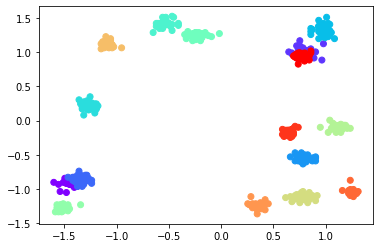

In [29]:
plt.scatter(data_scaler2[:,0],data_scaler2[:,3], c=agglo2.labels_, cmap='rainbow')

### 3.2.3

In [30]:
data_spectral2 = data_scaled2.copy()

In [31]:
spectral2 = SpectralClustering(n_clusters=16)
spectral2.fit(data_spectral2)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=16, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

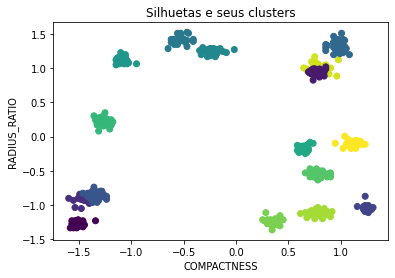

In [32]:
plt.scatter(data_scaler2[:,0], data_scaler2[:,3], c = spectral2.labels_)
plt.title('Silhuetas e seus clusters')
plt.xlabel('COMPACTNESS')
plt.ylabel('RADIUS_RATIO')
plt.show()


# 4. Avaliação

In [33]:
lista = np.array(label[0].tolist())

In [34]:
for i in lista:
    lista[i] = lista[i] - 1

### 4.1.1 KMeans - Completo

In [35]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans.cluster_centers_, 16, dataset, newData)

In [36]:
# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)

In [37]:
# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
# hbt = calinski_harabaz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
# silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
# print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
# print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 63  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 61  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0 

### 4.1.2 KMeans - Selecionado

In [38]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

In [39]:
# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(kmeans2.cluster_centers_, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)

# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)


Confusion Matrix: 
 [[ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0 

/home/gabriel/Faculdade/aprendizadoMaquina/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


### 4.2.1 Agglomerative Clustering - Completo

In [40]:
def centroide(data):
    array2 = []
    for valor in range(0,16):
        df_aux = data.loc[data.Label == valor]
        array = []
        for coluna in df_aux:
            array.append(df_aux[coluna].mean())

        array2.append(array)

    return np.array(array2)

In [41]:
data_agglo['Label'] = agglo.labels_
data_agglo

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,-0.346046,0.753920,-0.249457,-1.571379,-0.741871,1.413562,0.588274,-0.477591,-1.425007,0.766923,...,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389,0
1,-0.286521,0.701178,-0.229892,-1.488251,-0.775518,1.286234,0.632086,-0.309097,-1.425007,0.857375,...,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003,0
2,-0.375808,0.701178,-0.269023,-1.592161,-0.725048,1.439028,0.588274,-0.443892,-1.496230,0.842299,...,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292,0
3,-0.286521,0.578114,-0.229892,-1.321994,-0.573638,1.337165,0.653992,-0.309097,-1.140117,0.676472,...,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003,0
4,-0.197234,0.630856,-0.092935,-1.529815,-0.809165,1.260769,0.719710,-0.460741,-1.472489,0.857375,...,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.278964,-0.986552,1.080982,-1.051828,0.805879,0.293078,0.281590,0.786112,0.735410,-1.102406,...,0.635400,-0.169876,-0.379866,-0.991296,-0.751717,-0.812096,0.019936,-0.193643,-0.751775,12
1020,0.249202,-0.986552,1.100547,-1.051828,0.805879,0.293078,0.281590,0.802961,0.735410,-1.087331,...,0.618745,-0.187035,-0.379866,-0.991296,-0.751717,-0.812096,0.019936,-0.193643,-0.751775,12
1021,0.159915,-1.004133,1.139678,-1.031046,0.856349,0.267612,0.237778,0.769262,0.782892,-1.087331,...,0.602090,-0.169876,-0.379866,-1.012117,-0.751717,-0.763431,0.019936,-0.172638,-0.787582,12
1022,0.308726,-0.881069,1.022286,-1.114174,0.789056,0.318543,0.193966,0.769262,0.664187,-1.042105,...,0.635400,-0.152717,-0.379866,-1.053761,-0.785747,-0.795874,0.001854,-0.172638,-0.787582,12


In [42]:
centroide_hieraquico = centroide(data_agglo)

In [43]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 0  0  0 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 63  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 61  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0  0 

/home/gabriel/Faculdade/aprendizadoMaquina/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


### 4.2.2  Agglomerative Clustering - Selecionado

In [44]:
data_agglo2['Label'] = agglo2.labels_
data_agglo2.head()

,0,1,2,3,Label
0,0.766923,0.183892,-0.639551,1.035764,1
1,0.857375,0.199688,-0.545819,1.050677,1
2,0.842299,0.215484,-0.655172,1.035764,1
3,0.676472,0.294465,-0.592685,0.976113,1
4,0.857375,0.215484,-0.545819,1.005939,1


In [45]:
centroide_hieraquico2 = centroide(data_agglo2)

In [46]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_hieraquico2, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0 

/home/gabriel/Faculdade/aprendizadoMaquina/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


### 4.3.1 Spectral Clustering - Completo

In [47]:
data_spectral['Label'] = spectral.labels_
data_spectral.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,-0.346046,0.753920,-0.249457,-1.571379,-0.741871,1.413562,0.588274,-0.477591,-1.425007,0.766923,...,-1.496459,1.545976,-0.128504,-0.637324,-1.143062,-0.114565,-1.191569,1.003664,1.074389,7
1,-0.286521,0.701178,-0.229892,-1.488251,-0.775518,1.286234,0.632086,-0.309097,-1.425007,0.857375,...,-1.263286,1.563134,-0.128504,-0.616502,-1.057987,-0.001014,-1.083076,0.940647,1.146003,6
2,-0.375808,0.701178,-0.269023,-1.592161,-0.725048,1.439028,0.588274,-0.443892,-1.496230,0.842299,...,-1.496459,1.528817,-0.092595,-0.678968,-1.143062,-0.082122,-1.227734,1.024669,1.092292,7
3,-0.286521,0.578114,-0.229892,-1.321994,-0.573638,1.337165,0.653992,-0.309097,-1.140117,0.676472,...,-1.429838,1.460183,-0.056686,-0.783077,-1.126047,-0.114565,-1.155405,0.793610,1.146003,7
4,-0.197234,0.630856,-0.092935,-1.529815,-0.809165,1.260769,0.719710,-0.460741,-1.472489,0.857375,...,-1.463148,1.511658,-0.092595,-0.304174,-1.228137,0.080094,-1.318144,0.856626,0.859546,6


In [48]:
centroide_spectral = centroide(data_spectral)

array([[ 9.79483994e-02,  1.35069595e+00, -6.35871702e-01,
         2.47050742e-01, -2.22778243e-02,  2.92082954e-01,
         4.77289736e-01, -1.20989639e-01,  4.08602268e-01,
         1.00903978e-01,  9.81858511e-02, -5.36406460e-01,
         6.57477679e-02,  1.72714798e-01,  5.64253083e-01,
        -2.70762956e-02,  2.55652562e-01, -4.86450146e-01,
         9.40362592e-01, -4.33053644e-01, -1.95688550e-01,
         1.98477000e-01,  6.14275898e-02, -3.92274273e-01,
         5.31746409e-01, -4.08761595e-01, -3.69811750e-01,
         8.31342163e-01,  2.37114659e-01,  7.24505306e-01,
         1.70504651e-01,  1.98967313e-02,  0.00000000e+00],
       [-2.33041622e-01, -1.03462420e+00, -3.61040615e-01,
         7.28609932e-01, -1.73997037e+00,  5.37387872e-01,
         1.53433964e+00, -9.09882233e-01, -8.42985615e-01,
        -1.44466112e+00,  8.33014005e-01, -5.73986298e-01,
         5.63123310e-01, -9.37045278e-01,  1.54550296e-01,
         9.53399532e-01, -3.62354441e-01,  6.31100978e-

In [49]:
dataset = data.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data)
newData.ndim = len(data.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
# hbt = calinski_harabaz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
# silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
# print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
# print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 0  0  0 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 63  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0  0]
 [ 0  0  0  0  0 64 

### 4.3.2  Spectral Clustering - Selecionado

In [50]:
data_spectral2['Label'] = spectral2.labels_
data_spectral2.head()

,0,1,2,3,Label
0,0.766923,0.183892,-0.639551,1.035764,14
1,0.857375,0.199688,-0.545819,1.050677,14
2,0.842299,0.215484,-0.655172,1.035764,14
3,0.676472,0.294465,-0.592685,0.976113,14
4,0.857375,0.215484,-0.545819,1.005939,14


In [51]:
centroide_spectral2 = centroide(data_spectral2)

In [52]:
dataset = data_reduzida.values

class Data:
    namostras = 0
    ndim = 0
    ncluster = 0

newData = Data()

newData.namostras = len(data_reduzida)
newData.ndim = len(data_reduzida.columns)
newData.ncluster = 16


labels_true = lista

# predict recebe os rotulos preditos pelo algoritmo de clustering
predict = rotulos(centroide_spectral2, 16, dataset, newData)

# labels_predict sao as labels ja organizadas para comparacao correta com os rotulos originais do conjunto de dados
labels_predict = labelmatch(labels_true,predict,newData.ncluster)


# METRICAS PARA AVALIACAO DO CLUSTERING
cft = confusion_matrix(labels_true, labels_predict)
hbt = calinski_harabaz_score(dataset,labels_predict)
arit = adjusted_rand_score(labels_true, labels_predict)
amit = adjusted_mutual_info_score(labels_true, labels_predict)
f1t = f1_score(labels_true, labels_predict, average='macro')
accurracyt =accuracy_score(labels_true, labels_predict)
silhouettet = silhouette_score(dataset, labels_predict)

print('Confusion Matrix: \n', cft)
print('\nCalinski-Harabaz Score: ',hbt)
print('\nAdjusted-Rand Score: ',arit)
print('\nAdjusted Mutual Info Score: ',amit)
print('\nF1 Score: ',f1t)
print('\nAccuracy Score: ',accurracyt)
print('\nSilhouette Score: ',silhouettet)

Confusion Matrix: 
 [[ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 64  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

/home/gabriel/Faculdade/aprendizadoMaquina/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
